In [ ]:
from PIL import Image
import time
import copy
import random
import cv2
import re
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
%matplotlib inline

import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from pathlib import Path
from sklearn.model_selection import train_test_split


#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER

#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers



#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [ ]:
import keras
!pip install keras

In [ ]:
!pip install jovian --upgrade --quiet
project_name = 'surface-crack-detection-project'

     |████████████████████████████████| 68 kB 2.7 MB/s 


In [ ]:
import os
import zipfile

local_zip = '/tmp/concerete_crack_images/concerete_crack_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/concerete_crack_images/')
zip_ref.close()

In [ ]:
!ls /tmp/surface-crack-detection/concerete_crack_images

ls: cannot access '/tmp/surface-crack-detection/concerete_crack_images': No such file or directory


In [ ]:
train_data_dir_pos  = '/tmp/concerete_crack_images/concerete_crack_images/training/Positive'


crack_images = os.listdir(train_data_dir_pos)

print(len(crack_images))

16070


In [ ]:
train_data_dir_neg  = '/tmp/concerete_crack_images/concerete_crack_images/training/Negative'


no_crack_images = os.listdir(train_data_dir_neg)

print(len(no_crack_images))

16037


In [ ]:
cd /tmp/surface-crack-detection/concerete_crack_images

[Errno 2] No such file or directory: '/tmp/surface-crack-detection/concerete_crack_images'
/content


In [ ]:
positive_dir = Path('/tmp/concerete_crack_images/concerete_crack_images/training/Positive')
negative_dir = Path('/tmp/concerete_crack_images/concerete_crack_images/training/Negative')

*****************Random Images with Cracks**************************


NameError: ignored

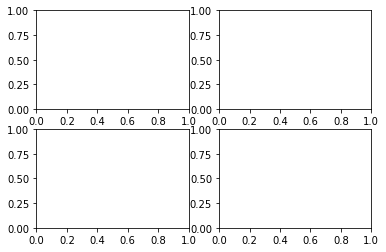

In [ ]:
random_indices = np.random.randint(0, len(crack_images), size=4)
print("*****************Random Images with Cracks**************************")
random_images = np.array(crack_images)[random_indices.astype(int)]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mpimg.imread(os.path.join(cwd, positive_dir, random_images[0])))
axarr[0,1].imshow(mpimg.imread(os.path.join(cwd, positive_dir, random_images[1])))
axarr[1,0].imshow(mpimg.imread(os.path.join(cwd, positive_dir, random_images[2])))
axarr[1,1].imshow(mpimg.imread(os.path.join(cwd, positive_dir, random_images[3])))

*****************Random Images without Cracks**************************


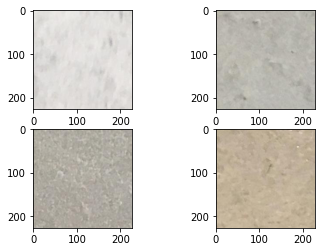

In [ ]:
## Visualize Random images with no cracks
random_indices = np.random.randint(0, len(no_crack_images), size=4)
print("*****************Random Images without Cracks**************************")
random_images = np.array(no_crack_images)[random_indices.astype(int)]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mpimg.imread(os.path.join(cwd, negative_dir, random_images[0])))
axarr[0,1].imshow(mpimg.imread(os.path.join(cwd, negative_dir, random_images[1])))
axarr[1,0].imshow(mpimg.imread(os.path.join(cwd, negative_dir, random_images[2])))
axarr[1,1].imshow(mpimg.imread(os.path.join(cwd, negative_dir, random_images[3])))

In [ ]:
dir = Path('/tmp/concerete_crack_images/concerete_crack_images/training')

In [ ]:
dir_test = Path('/tmp/concerete_crack_images/concerete_crack_images')

In [ ]:
Test_png = list(dir_test.glob(r"*/*.png"))




In [ ]:
Test_png_Series = pd.Series(Test_png,name="jpg").astype(str)

Test_png_df = Test_png_Series.to_frame()
Test_png_df["CATEGORY"] = ''
Test_png_df




,jpg,CATEGORY
0,/tmp/concerete_crack_images/concerete_crack_im...,
1,/tmp/concerete_crack_images/concerete_crack_im...,
2,/tmp/concerete_crack_images/concerete_crack_im...,
3,/tmp/concerete_crack_images/concerete_crack_im...,
4,/tmp/concerete_crack_images/concerete_crack_im...,
...,...,...
7888,/tmp/concerete_crack_images/concerete_crack_im...,
7889,/tmp/concerete_crack_images/concerete_crack_im...,
7890,/tmp/concerete_crack_images/concerete_crack_im...,
7891,/tmp/concerete_crack_images/concerete_crack_im...,


In [ ]:
Crack_jpg_Path = list(dir.glob(r"*/*.jpg"))



In [ ]:
Crack_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Crack_jpg_Path))

In [ ]:
Crack_jpg_Path_Series = pd.Series(Crack_jpg_Path,name="jpg").astype(str)
Crack_Labels_Series = pd.Series(Crack_Labels,name="CATEGORY")
Crack_jpg_Path_Series


0        /tmp/concerete_crack_images/concerete_crack_im...
1        /tmp/concerete_crack_images/concerete_crack_im...
2        /tmp/concerete_crack_images/concerete_crack_im...
3        /tmp/concerete_crack_images/concerete_crack_im...
4        /tmp/concerete_crack_images/concerete_crack_im...
                               ...                        
32102    /tmp/concerete_crack_images/concerete_crack_im...
32103    /tmp/concerete_crack_images/concerete_crack_im...
32104    /tmp/concerete_crack_images/concerete_crack_im...
32105    /tmp/concerete_crack_images/concerete_crack_im...
32106    /tmp/concerete_crack_images/concerete_crack_im...
Name: jpg, Length: 32107, dtype: object

In [ ]:
Main_Crack_Data = pd.concat([Crack_jpg_Path_Series,Crack_Labels_Series],axis=1)

In [ ]:
Main_Crack_Data

,jpg,CATEGORY
0,/tmp/concerete_crack_images/concerete_crack_im...,Positive
1,/tmp/concerete_crack_images/concerete_crack_im...,Positive
2,/tmp/concerete_crack_images/concerete_crack_im...,Positive
3,/tmp/concerete_crack_images/concerete_crack_im...,Positive
4,/tmp/concerete_crack_images/concerete_crack_im...,Positive
...,...,...
32102,/tmp/concerete_crack_images/concerete_crack_im...,Negative
32103,/tmp/concerete_crack_images/concerete_crack_im...,Negative
32104,/tmp/concerete_crack_images/concerete_crack_im...,Negative
32105,/tmp/concerete_crack_images/concerete_crack_im...,Negative


In [ ]:
Main_Crack_Data = Main_Crack_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Crack_Data.head(-1))

                                                     jpg  CATEGORY
0      /tmp/concerete_crack_images/concerete_crack_im...  Negative
1      /tmp/concerete_crack_images/concerete_crack_im...  Negative
2      /tmp/concerete_crack_images/concerete_crack_im...  Positive
3      /tmp/concerete_crack_images/concerete_crack_im...  Positive
4      /tmp/concerete_crack_images/concerete_crack_im...  Positive
...                                                  ...       ...
32101  /tmp/concerete_crack_images/concerete_crack_im...  Positive
32102  /tmp/concerete_crack_images/concerete_crack_im...  Positive
32103  /tmp/concerete_crack_images/concerete_crack_im...  Negative
32104  /tmp/concerete_crack_images/concerete_crack_im...  Negative
32105  /tmp/concerete_crack_images/concerete_crack_im...  Positive

[32106 rows x 2 columns]


In [ ]:
def threshold_vision(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    _,Threshold_Img = cv2.threshold(Reading_Img,130,255,cv2.THRESH_BINARY_INV)
    
    plt.xlabel(Threshold_Img.shape)
    plt.ylabel(Threshold_Img.size)
    plt.imshow(Threshold_Img)

In [ ]:
Positive_Crack = Main_Crack_Data[Main_Crack_Data["CATEGORY"] == "Positive"]
Negative_Crack = Main_Crack_Data[Main_Crack_Data["CATEGORY"] == "Negative"]

Positive_Crack = Positive_Crack.reset_index()
Negative_Crack = Negative_Crack.reset_index()

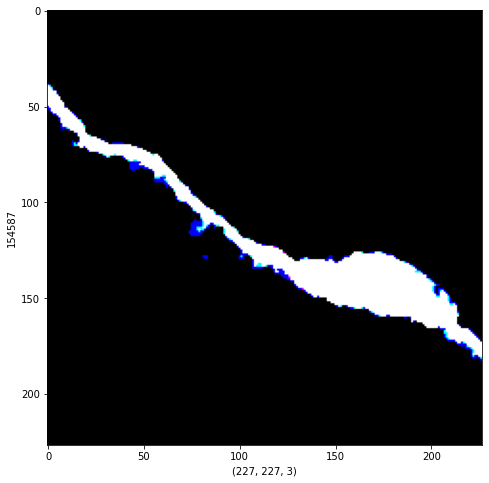

In [ ]:
threshold_vision(Main_Crack_Data["jpg"][5])

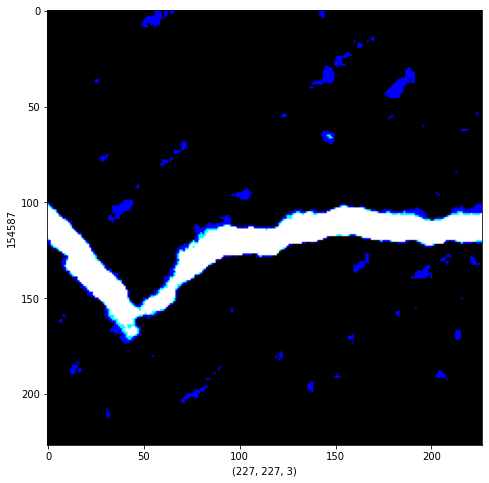

In [ ]:
threshold_vision(Main_Crack_Data["jpg"][2])

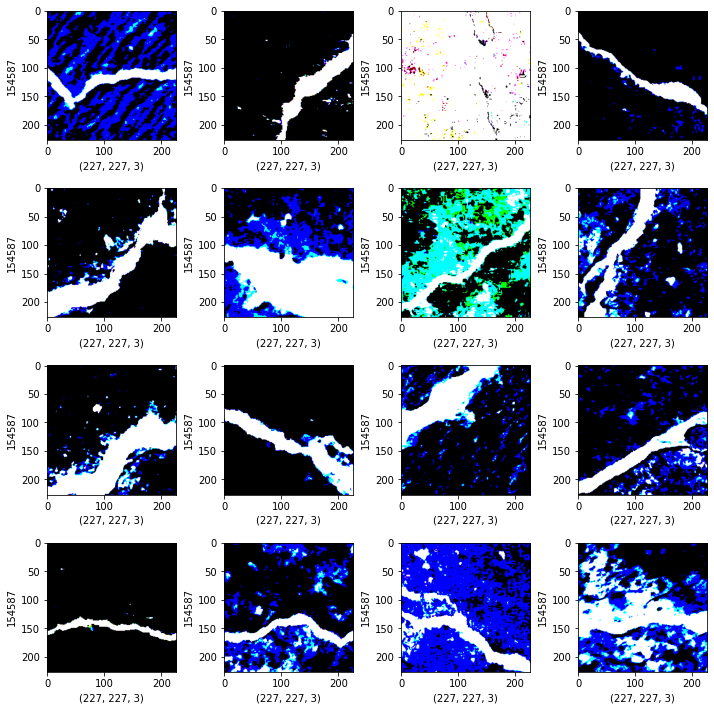

In [ ]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Crack["jpg"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    
    operations.set_xlabel(Threshold_Img.shape)
    operations.set_ylabel(Threshold_Img.size)
    operations.imshow(Threshold_Img)
    
plt.tight_layout()
plt.show()

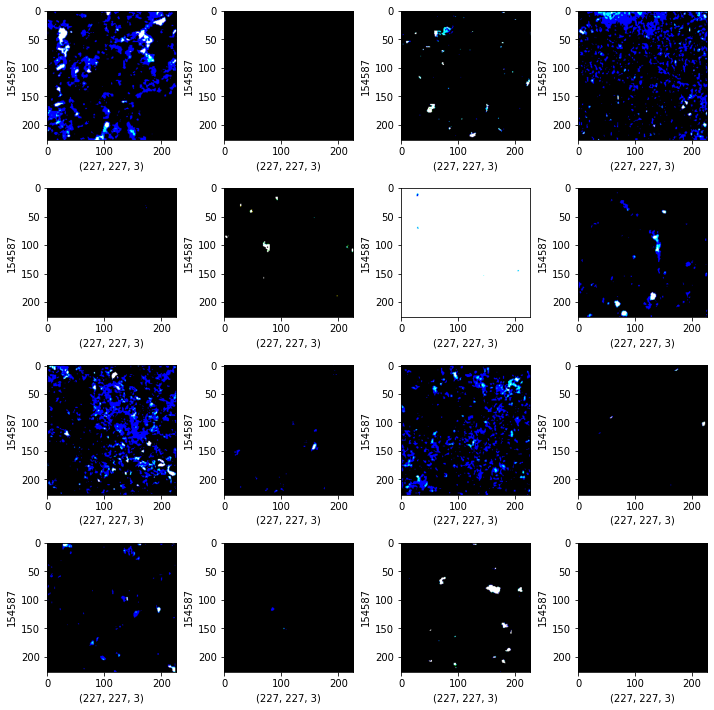

In [ ]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Negative_Crack["jpg"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    
    operations.set_xlabel(Threshold_Img.shape)
    operations.set_ylabel(Threshold_Img.size)
    operations.imshow(Threshold_Img)
    
plt.tight_layout()
plt.show()

In [ ]:
train_df, test_df = train_test_split(Main_Crack_Data,train_size=0.7,shuffle=True,random_state=42)

In [ ]:
train_df.shape

(22474, 2)

In [ ]:
test_df.shape

(9633, 2)

In [ ]:
Test_png_df.shape


(7893, 2)

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
Test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='jpg',
    y_col='CATEGORY',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training')

NameError: ignored

In [ ]:
val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='jpg',
    y_col='CATEGORY',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation')

Found 4494 validated image filenames belonging to 2 classes.


In [ ]:
test_data = train_gen.flow_from_dataframe(
    test_df,
    x_col='jpg',
    y_col='CATEGORY',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False,
    seed=42)

Found 9633 validated image filenames belonging to 2 classes.


In [ ]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 32)               0   

In [ ]:
history = model.fit(train_data,validation_data=val_data,epochs=50,
            callbacks=[tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True)])

Epoch 1/50
562/562 [==============================] - 47s 82ms/step - loss: 0.4987 - accuracy: 0.7761 - val_loss: 0.2537 - val_accuracy: 0.9495
Epoch 2/50
562/562 [==============================] - 35s 62ms/step - loss: 0.1731 - accuracy: 0.9545 - val_loss: 0.1229 - val_accuracy: 0.9646
Epoch 3/50
562/562 [==============================] - 36s 64ms/step - loss: 0.1098 - accuracy: 0.9680 - val_loss: 0.0921 - val_accuracy: 0.9673
Epoch 4/50
562/562 [==============================] - 34s 61ms/step - loss: 0.0852 - accuracy: 0.9742 - val_loss: 0.0788 - val_accuracy: 0.9771
Epoch 5/50
562/562 [==============================] - 35s 62ms/step - loss: 0.0779 - accuracy: 0.9763 - val_loss: 0.0785 - val_accuracy: 0.9786
Epoch 6/50
562/562 [==============================] - 35s 63ms/step - loss: 0.0704 - accuracy: 0.9778 - val_loss: 0.0669 - val_accuracy: 0.9791
Epoch 7/50
562/562 [==============================] - 35s 62ms/step - loss: 0.0670 - accuracy: 0.9789 - val_loss: 0.0666 - val_accuracy:

In [ ]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))

In [ ]:
evaluate_model(model, test_data)

    Test Loss: 0.05201
Test Accuracy: 98.40%


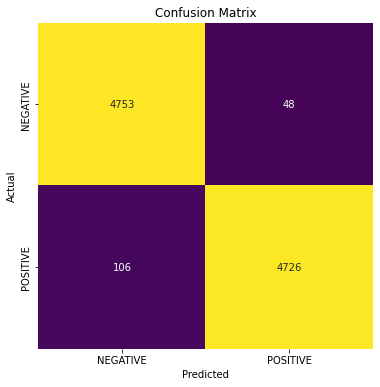

In [ ]:
y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
cm = confusion_matrix(test_data.labels, y_pred)
clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='viridis', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.98      0.99      0.98      4801
    POSITIVE       0.99      0.98      0.98      4832

    accuracy                           0.98      9633
   macro avg       0.98      0.98      0.98      9633
weighted avg       0.98      0.98      0.98      9633

